In [3]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import statistics as sts
from scipy import stats
import math
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
from scipy.stats import t

# T-score

In [4]:
# caluculating the T-test

def t_score(sample_mean,pop_mean,sample_std,n):
    numarator = sample_mean-pop_mean
    denominator = sample_std/math.sqrt(n)
    t_score = numarator/denominator
    return(t_score)

Step - 1:    
    Alternate Hypothesis (Bold claim): $ H_1\ \Rightarrow \ >, \ < , \ \neq $    
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $     

Step - 2:

- Collect a sample of size n    
- Compute the mean from this sample $ \bar{x} $ 

Step - 3:
- Compute Test Statistic:     
    $$ Z = \frac {\overline x - \mu}{\sigma/ \sqrt(n)} $$

- If population variance is known
$$ t = \frac {\overline x - \mu}{s/ \sqrt(n)} $$

step-4 :
- Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis. calculate $ z-critical\ (z_{\frac{\alpha}{2}})\ or \ t-critical \ (t_{n-1,\frac{\alpha}{2}} $

step-5 :

Step - 5.1: Apply decision rule:

- If test statistic is z-score -
  - Two tailed z-test: $$ |z|\ > \ z_{\frac{\alpha}{2}} \Rightarrow \ Accept \ H_1 or \ Reject \ H_0 $$
  - Right tailed z-test:$$ z\ > \ z_{\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
   - Left tailed z-test:$$ z\ < \ -z_{\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
   
- If test statistic is t-score
  - Two tailed t-test: $$ |t|\ > \ t_{n-1,\frac{\alpha}{2}} \Rightarrow \ Accept \ H_1 or \ Reject \ H_0 $$
  - Right tailed t-test:$$ t\ > \ t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
  - Left tailed t-test:$$ t\ < \ t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
  
Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $

For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$

Now,   
   $$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$


## Question 1
Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? 


### step 1

Alternative Hypothesis :

$H_1$ : On average each packet does not contain 500 grams of biryani.    (p!==500)

Null Hypothesis :

$H_0$ : On average each packet contain 500 grams of biryani

### step 2 

In [5]:
#Given

pop_mean = 500

$$ T-score = \frac {\overline x - \mu}{s/ \sqrt(n)} $$

In [6]:
sample = np.array([490, 220, 470, 500, 495, 496, 496, 498, 508, 480])
sample_mean = np.mean(sample)
sample_std = np.std(sample,ddof=1)
n = len(sample)
pop_mean = 500

### step 3 : statistics testing

In [5]:
t_stat = t_score(sample_mean,pop_mean,sample_std,n)

In [6]:
print(t_stat)

-1.263475128444671


### step 4 :  

$$t_{critical} = t_{ n-1,\frac{\alpha}{2} }$$

In [7]:
# defineing the alpha and caluculating T-critical
# Two tailed test


confidence_level = 0.95
df = n-1

alpha = 1-confidence_level

t_critical = t.ppf(1-alpha/2,df =df)


In [8]:
t_critical

2.2621571627409915

### step 5

In [9]:
if (abs(t_stat)>t_critical) : 
    print('Reject the null hypothasis')
else:
    print('Failed to reject the null hypothasis ')

Failed to reject the null hypothasis 


In [10]:
# Conclusion using p test

p_value = 2*(1 - t.cdf(t_stat,df=df))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


p_value =  1.761835294146723
Fail to reject Null Hypothesis


In [11]:
# Ploting the sampling distribution with rejection regions
x_min = 300
x_max = 800

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std 



(300.0, 800.0)

Text(465.3, 0.0007, 'x_bar')

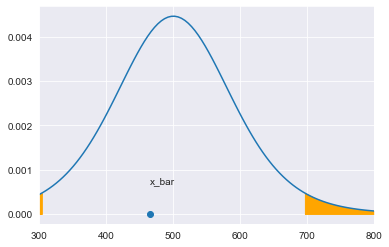

In [29]:
# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = t.pdf(x,df,mean,std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = t.pdf(x1,df, mean, std)
plt.fill_between(x1, y1, color='orange')

# Shading the right rejection region
x2 = np.linspace(t_critical_right,x_max,100)
y2 = t.pdf(x2,df, mean, std)
plt.fill_between(x2, y2, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))



## Question 2 
You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

### step 1
$$H_1 =    p>4(altternative  hypothasis,blod claim)    $$

$$H_O   =  p\underline<4 (null hypo)$$

### step 2

![sample](https://render.githubusercontent.com/render/math?math=%5B4%2C%203%2C%205%2C%204%2C%205%2C%203%2C%205%2C%205%2C%204%2C%202%2C%204%2C%205%2C%205%2C%204%2C%204%2C%205%2C%204%2C%205%2C%204%2C%205%5D&mode=display)

# step-2

In [31]:
sample = [4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]

In [33]:
sample_mean = sts.mean(sample)
sample_std = sts.stdev(sample)
n = len(sample)
population_mean =4

# step-3

In [34]:
# one tailed test

t_stat = t_score(sample_mean,population_mean,sample_std,n)

In [35]:
t_stat

1.3142574813455419

In [36]:
sample_mean

4.25

## step 4

In [37]:
# define alpha and find t_critical
confidence_level = 0.95 
df = n-1
alpha = 1-confidence_level
t_critical = t.ppf(1-alpha,df)

In [38]:
t_critical

1.729132811521367

### step 5

In [39]:
if t_stat>t_critical:
    print("reject the null hypothasis") 
else:
    print('failed to reject the null hypothasis')

failed to reject the null hypothasis


In [40]:
# p value 

p_value = 1- t.cdf(np.abs(t_stat),df =df)

In [41]:
p_value

0.10220287084734081

In [42]:
if p_value<alpha:
    print('reject the null hy')
else:
    print ('failed to reject null hypo')


failed to reject null hypo


Text(4.25, 0.1, 'x_bar')

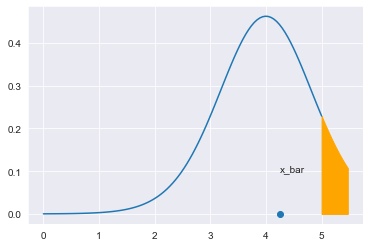

In [58]:
# define the limits

x_min = 0
x_max = 5

# Defining the sampling distribution mean and sampling distribution std
mean = population_mean
std = sample_std


# Computing the left and right critical values (Two tailed Test)
x = np.linspace(x_min, x_max,100)
y = t.pdf(x,df, mean, std)
plt.plot(x,y)

t_critical_right =mean+ t_critical*std




# Shading the right rejection region
x2 = np.linspace(t_critical_right,x_max,100)
y2 = t.pdf(x2,df, mean, std)
plt.fill_between(x2, y2, color='orange')


plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))




#shading the rejion

# Question 3

Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? (Given that the population std is 1)



### step 1
- Defining hypothasis

$$H_1 =    p>15(altternative  hypothasis,blod claim)    $$

$$H_O   =  p\leq15 (null hypo)$$

### Step 2

In [103]:
# population mean

pop_mean = 15


In [170]:
sample = [14.08,14.13,15.65,13.78,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]

In [171]:
sample_mean =sts.mean(sample)
sample_std= sts.stdev(sample)
n = len(sample)

In [172]:
sample_mean

15.037894736842105

### step 3

In [107]:
# one tailed test

t_stat = t_score(sample_mean,pop_mean,sample_std,n)

In [108]:
t_stat

0.16268007704402773

### step 4

In [109]:
# One Tail

confidence_level = 0.95

alpha = 1 - confidence_level
df = n-1
t_critical= t.ppf(1-alpha,df)

In [110]:
t_critical= t.ppf(1-alpha,df)

In [111]:
t_critical

1.7340636066175354

### step 5

In [112]:
if (t_stat>t_critical):
    print('Reject the Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Failed to reject Null Hypothesis


In [113]:
# One tail

p_value = 1.0 - t.cdf(t_stat,df=df)
print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")



p_value =  0.4362913650833504
Fail to reject Null Hypothesis


In [114]:
x_min = 10
x_max = 20

mean= pop_mean
std = sample_std

Text(15.037894736842105, 0.1, 'x_bar')

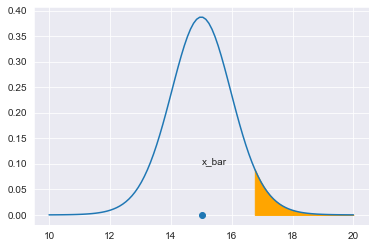

In [115]:
x= np.linspace(x_min,x_max,100)
y = t.pdf(x,df,mean,std)
plt.plot(x,y)

t_critical_right = mean+(t_critical)*std

#shading the rejected rejion(right)

x2= np.linspace(t_critical_right,x_max,100)
y2 = t.pdf(x2,df,mean,std)
plt.fill_between(x2,y2,color='orange')

plt.scatter(sample_mean,0)
plt.annotate("x_bar", (sample_mean, 0.1))




# Question 4
Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? 



### step 1
- let's define hypothasis

-  Alternate Hypothesis  $$H_1 = p<100     (Bold\ claim) $$    
- Null Hypothesis $$H_0 = p\geq100      $$


### step 2

In [173]:
pop_mean = 100

In [174]:
np.random.seed(15) 

In [175]:
sample = np.random.randint(90,105,size= (100,1))

In [176]:
sample

array([[ 98],
       [ 95],
       [102],
       [ 95],
       [ 97],
       [ 90],
       [102],
       [101],
       [ 97],
       [101],
       [ 95],
       [ 96],
       [103],
       [ 91],
       [103],
       [ 97],
       [ 90],
       [104],
       [100],
       [ 94],
       [ 99],
       [ 97],
       [ 95],
       [ 93],
       [102],
       [103],
       [102],
       [103],
       [ 96],
       [ 98],
       [ 92],
       [ 91],
       [ 91],
       [ 90],
       [ 95],
       [100],
       [ 92],
       [101],
       [ 92],
       [ 91],
       [ 98],
       [ 95],
       [ 96],
       [ 99],
       [ 92],
       [ 98],
       [ 96],
       [ 98],
       [ 98],
       [102],
       [ 93],
       [ 94],
       [ 97],
       [ 92],
       [100],
       [ 90],
       [ 95],
       [ 97],
       [ 93],
       [ 98],
       [ 95],
       [102],
       [103],
       [ 93],
       [ 91],
       [ 90],
       [ 98],
       [ 97],
       [ 95],
       [103],
       [102],
      

In [177]:
pop_mean = 100
sample_mean = sample.mean()
sample_std = sample.std(ddof=1)
n = len(sample)



In [178]:
sample_mean

96.92

### step 3

In [179]:
t_stat = t_score(sample_mean,pop_mean,sample_std,n)

print(t_stat)

-7.110829567943099


### step 4

In [180]:
# one tailed test
confidence_level = 0.99
alpha = 1- confidence_level
df = n-1

t_critical = t.ppf(1-alpha,df)
print(t_critical)

2.3646058614359737


### step 5

In [181]:
if t_stat<t_critical:
    print('reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

reject the null hypothesis


In [182]:
p_value = 1-t.cdf(np.abs(t_stat),df)

In [183]:
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


In [184]:
x_max = 120
x_min = 80

mean = pop_mean
std = sample_std

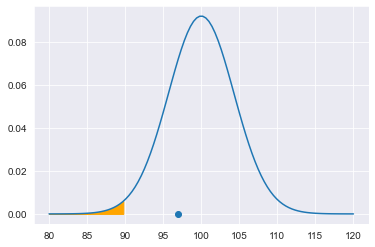

In [169]:
x = np.linspace(x_max,x_min,100)
y = t.pdf(x,df,mean,std)
plt.plot(x,y)


t_critical_left = pop_mean + (-t_critical * std)


# rejecting region

x1= np.linspace(x_min,t_critical_left,100)
y1 = t.pdf(x1,df,mean,std)
plt.fill_between(x1, y1, color='orange')


plt.scatter(sample_mean,0)
plt.annotate("x_bar", (sample_mean, 0.1))




